## Data Science and Business Analytics Internship
## Task 5: Prediction Using Decision Tree Algorithm
## Author: Ahmed Mohammed 



### Importing nessecary libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import rcParams

import warnings
warnings.filterwarnings("ignore")

### Reading dataset

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Comparing various features


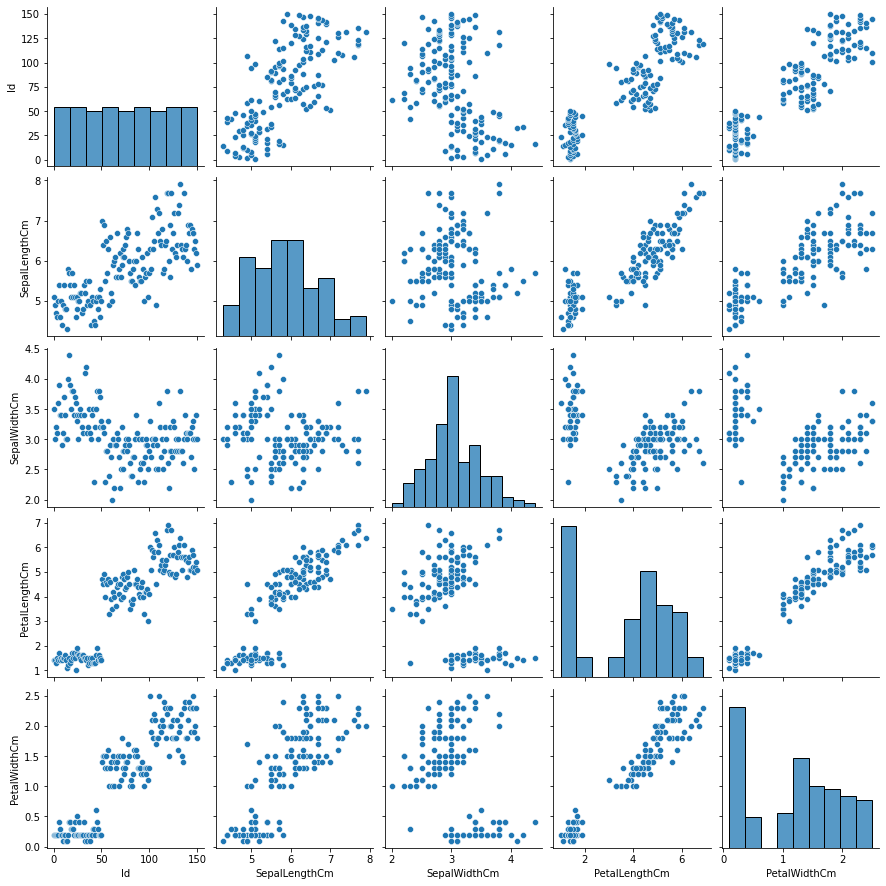

In [3]:
sns.pairplot(iris)

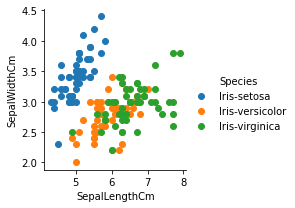

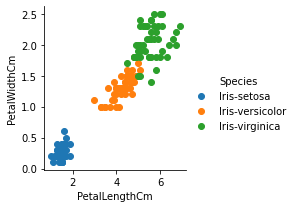

In [4]:
# Scatter plot of iris based on Sepal Length and Width features
sns.FacetGrid(iris,hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

# Scatter plot of iris based on Petal Length and Width features
sns.FacetGrid(iris,hue='Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

### Getting the information of the data

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.shape

(150, 6)

In [8]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Drop unnecessary columns

In [9]:
iris = iris.drop(columns = ['Id'],axis = 1)

### Correlation between multiple variables

In [10]:
corr = iris.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Decision Tree model training

In [11]:
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y = iris['Species']

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify=Y,test_size = 0.30,random_state = 0)

In [13]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [14]:
clf = DecisionTreeClassifier(random_state = 0)

model = clf.fit(X_train,Y_train)

Y_predict = clf.predict(X_test)

### Creating Confusion Matrix

In [15]:
confusion_matrix(Y_test, Y_predict)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

### Visualizing the Decision Tree


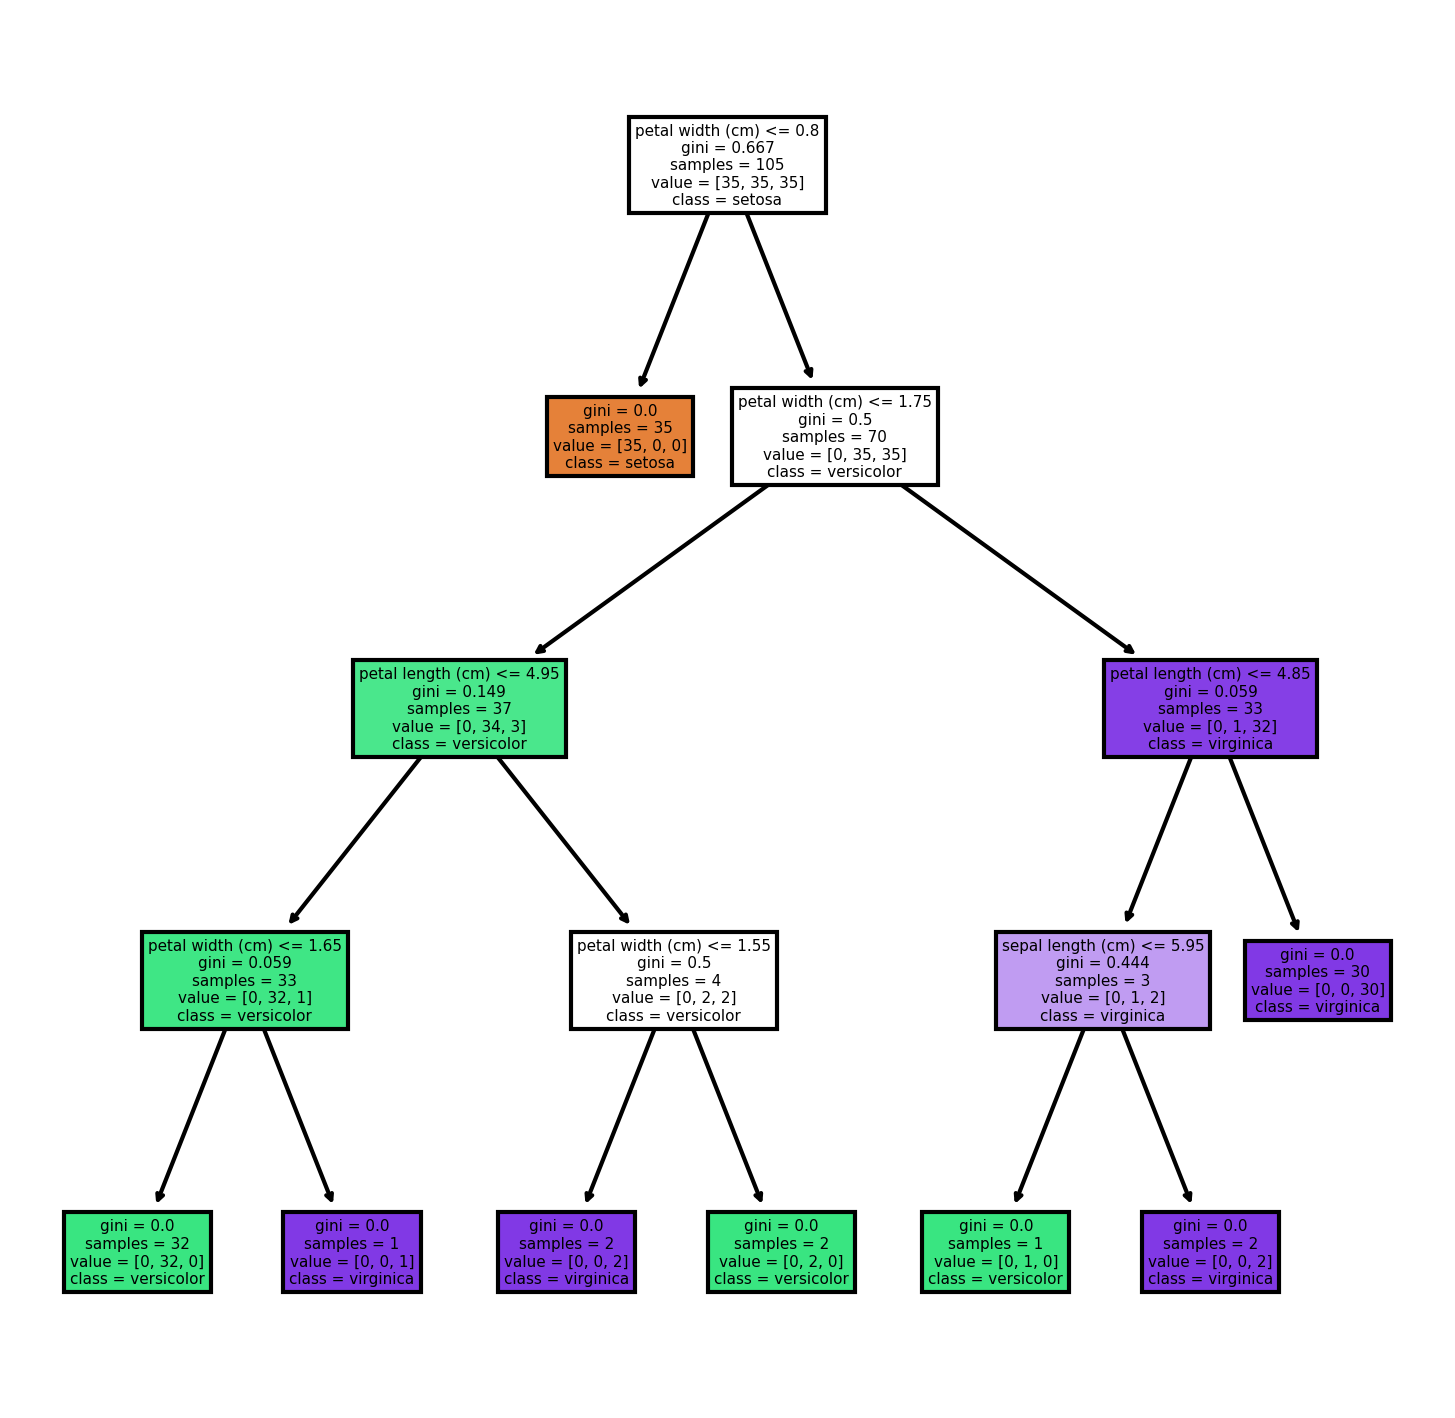

In [16]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6), dpi = 300)

tree.plot_tree(clf, feature_names = fn, class_names = cn, filled = True);

### Calculating the Model Accuracy

In [17]:
from sklearn.metrics import accuracy_score
# Model Accuracy
print("Accuracy:",accuracy_score(Y_test, Y_predict)*100)

Accuracy: 97.77777777777777
